Import dataset

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("data/games.csv")

In [95]:
df[['Genre 1', 'Genre 2']] = df['Genres'].str.split(',', n=2, expand=True)[[0, 1]]

df['Genre 1'] = df['Genre 1'].str.strip()
df['Genre 2'] = df['Genre 2'].str.strip()

Drop useless columns

In [96]:
drop_labels = ['AppID', 'About the game', 'Full audio languages', 'Reviews', 'Header image', 'Website','Support url','Support email','Metacritic url', 'User score','Score rank','Notes',
'Average playtime forever','Average playtime two weeks','Median playtime two weeks','Tags','Screenshots','Movies']
df.drop(axis= "columns", columns= drop_labels, inplace = True)

Extract the most important languages

In [97]:
lang_eng = df['Supported languages'].astype(str).str.contains("English")
lang_sp = df['Supported languages'].astype(str).str.contains("Spanish")
lang_de = df['Supported languages'].astype(str).str.contains("German")
lang_fr = df['Supported languages'].astype(str).str.contains("French")

df['Is English'] = lang_eng
df['Is Spanish'] = lang_sp
df['Is German'] = lang_de
df['Is French'] = lang_fr


Delete "Supported languages" column

In [98]:
df.drop(axis= "columns", columns= ['Supported languages'], inplace = True)

Extract the most important languages

In [99]:
cat_single = df['Categories'].astype(str).str.contains("Single-player")
cat_multi = df['Categories'].astype(str).str.contains("Multi-player")

df['Is Single-player'] = cat_single
df['Is Multi-player'] = cat_multi

Delete "Categories" column

In [100]:
df.drop(axis= "columns", columns= ['Categories'], inplace = True)

Extract first two genres

Delete "Genres" column

In [101]:
df.drop(axis= "columns", columns= ['Genres'], inplace = True)

Calculate number of developed and published games 

In [102]:
df

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,...,Developers,Publishers,Genre 1,Genre 2,Is English,Is Spanish,Is German,Is French,Is Single-player,Is Multi-player
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,False,...,Perpetual FX Creative,Perpetual FX Creative,Casual,Indie,True,False,False,False,True,True
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,False,...,Rusty Moyher,Wild Rooster,Action,Indie,True,True,True,True,True,False
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,False,...,Campião Games,Campião Games,Action,Adventure,True,False,False,False,True,False
3,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,True,...,Odd Critter Games,Odd Critter Games,Adventure,Casual,True,True,True,True,True,False
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,False,...,Unusual Games,Unusual Games,Adventure,Indie,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,Mannerheim's Saloon Car,"Jan 2, 2024",0 - 0,0,0,0.00,0,True,False,False,...,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo",Adventure,Simulation,True,False,False,False,True,False
85099,Beer Run,"Jan 3, 2024",0 - 0,0,0,0.00,0,True,False,False,...,955 Games,955 Games,Casual,Indie,True,False,False,False,True,False
85100,My Friend The Spider,"Jan 4, 2024",0 - 0,0,0,0.00,0,True,False,False,...,MCA,MCA,Adventure,Simulation,True,False,False,False,True,False
85101,Path of Survivors,"Jan 8, 2024",0 - 0,0,0,3.99,0,True,False,False,...,Limited Input,Limited Input,Action,Casual,True,False,False,False,True,False


Fuction to convert the "Estiated owners" column to int - average of the range

In [103]:
def convert_estimated_owners(owners_range):
    lower, upper = owners_range.split(' - ')
    return (int(lower) + int(upper) /2)

df['Estimated owners (avg)'] = df['Estimated owners'].apply(convert_estimated_owners)

In [104]:
df.drop(axis='columns', columns='Estimated owners', inplace=True)
df.head()


,Name,Release date,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,...,Publishers,Genre 1,Genre 2,Is English,Is Spanish,Is German,Is French,Is Single-player,Is Multi-player,Estimated owners (avg)
0,Galactic Bowling,"Oct 21, 2008",0,0,19.99,0,True,False,False,0,...,Perpetual FX Creative,Casual,Indie,True,False,False,False,True,True,10000.0
1,Train Bandit,"Oct 12, 2017",0,0,0.99,0,True,True,False,0,...,Wild Rooster,Action,Indie,True,True,True,True,True,False,10000.0
2,Jolt Project,"Nov 17, 2021",0,0,4.99,0,True,False,False,0,...,Campião Games,Action,Adventure,True,False,False,False,True,False,10000.0
3,Henosis™,"Jul 23, 2020",0,0,5.99,0,True,True,True,0,...,Odd Critter Games,Adventure,Casual,True,True,True,True,True,False,10000.0
4,Two Weeks in Painland,"Feb 3, 2020",0,0,0.00,0,True,True,False,0,...,Unusual Games,Adventure,Indie,True,True,False,False,True,False,10000.0


In [105]:
df['Genre 1'].unique()
df['Genre 1'].isnull().any()

True

Deleting data that wont go to the model

In [106]:
df

,Name,Release date,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,...,Publishers,Genre 1,Genre 2,Is English,Is Spanish,Is German,Is French,Is Single-player,Is Multi-player,Estimated owners (avg)
0,Galactic Bowling,"Oct 21, 2008",0,0,19.99,0,True,False,False,0,...,Perpetual FX Creative,Casual,Indie,True,False,False,False,True,True,10000.0
1,Train Bandit,"Oct 12, 2017",0,0,0.99,0,True,True,False,0,...,Wild Rooster,Action,Indie,True,True,True,True,True,False,10000.0
2,Jolt Project,"Nov 17, 2021",0,0,4.99,0,True,False,False,0,...,Campião Games,Action,Adventure,True,False,False,False,True,False,10000.0
3,Henosis™,"Jul 23, 2020",0,0,5.99,0,True,True,True,0,...,Odd Critter Games,Adventure,Casual,True,True,True,True,True,False,10000.0
4,Two Weeks in Painland,"Feb 3, 2020",0,0,0.00,0,True,True,False,0,...,Unusual Games,Adventure,Indie,True,True,False,False,True,False,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,Mannerheim's Saloon Car,"Jan 2, 2024",0,0,0.00,0,True,False,False,0,...,"Sodan ja rauhan keskus Muisti, Päämajamuseo",Adventure,Simulation,True,False,False,False,True,False,0.0
85099,Beer Run,"Jan 3, 2024",0,0,0.00,0,True,False,False,0,...,955 Games,Casual,Indie,True,False,False,False,True,False,0.0
85100,My Friend The Spider,"Jan 4, 2024",0,0,0.00,0,True,False,False,0,...,MCA,Adventure,Simulation,True,False,False,False,True,False,0.0
85101,Path of Survivors,"Jan 8, 2024",0,0,3.99,0,True,False,False,0,...,Limited Input,Action,Casual,True,False,False,False,True,False,0.0


In [107]:
name_games = df['Name']
to_drop = ['Name', 'Release date', 'Developers', 'Publishers', 'Genre 2']
df.drop(axis='columns', columns=to_drop, inplace=True)

Converting Genre 1 to int 1,2,3,4... etc. (I dont know if it is good to do it). We will delete missing values from Genre 1. We deleted Genre 2 earlier

In [108]:
df

,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,Positive,Negative,...,Recommendations,Median playtime forever,Genre 1,Is English,Is Spanish,Is German,Is French,Is Single-player,Is Multi-player,Estimated owners (avg)
0,0,0,19.99,0,True,False,False,0,6,11,...,0,0,Casual,True,False,False,False,True,True,10000.0
1,0,0,0.99,0,True,True,False,0,53,5,...,0,0,Action,True,True,True,True,True,False,10000.0
2,0,0,4.99,0,True,False,False,0,0,0,...,0,0,Action,True,False,False,False,True,False,10000.0
3,0,0,5.99,0,True,True,True,0,3,0,...,0,0,Adventure,True,True,True,True,True,False,10000.0
4,0,0,0.00,0,True,True,False,0,50,8,...,0,0,Adventure,True,True,False,False,True,False,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0,0,0.00,0,True,False,False,0,0,0,...,0,0,Adventure,True,False,False,False,True,False,0.0
85099,0,0,0.00,0,True,False,False,0,0,0,...,0,0,Casual,True,False,False,False,True,False,0.0
85100,0,0,0.00,0,True,False,False,0,0,0,...,0,0,Adventure,True,False,False,False,True,False,0.0
85101,0,0,3.99,0,True,False,False,0,0,0,...,0,0,Action,True,False,False,False,True,False,0.0


In [109]:
df.isnull().any()

Peak CCU                   False
Required age               False
Price                      False
DLC count                  False
Windows                    False
Mac                        False
Linux                      False
Metacritic score           False
Positive                   False
Negative                   False
Achievements               False
Recommendations            False
Median playtime forever    False
Genre 1                     True
Is English                 False
Is Spanish                 False
Is German                  False
Is French                  False
Is Single-player           False
Is Multi-player            False
Estimated owners (avg)     False
dtype: bool

In [110]:
df.dropna(inplace=True)

Converting data from Genre 1 to ints

In [111]:
df['Genre 1_encoded'] = pd.factorize(df['Genre 1'])[0] + 1

In [112]:
print(df[['Genre 1', 'Genre 1_encoded']])

         Genre 1  Genre 1_encoded
0         Casual                1
1         Action                2
2         Action                2
3      Adventure                3
4      Adventure                3
...          ...              ...
85098  Adventure                3
85099     Casual                1
85100  Adventure                3
85101     Action                2
85102     Casual                1

[81548 rows x 2 columns]


In [113]:
df

,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,Positive,Negative,...,Median playtime forever,Genre 1,Is English,Is Spanish,Is German,Is French,Is Single-player,Is Multi-player,Estimated owners (avg),Genre 1_encoded
0,0,0,19.99,0,True,False,False,0,6,11,...,0,Casual,True,False,False,False,True,True,10000.0,1
1,0,0,0.99,0,True,True,False,0,53,5,...,0,Action,True,True,True,True,True,False,10000.0,2
2,0,0,4.99,0,True,False,False,0,0,0,...,0,Action,True,False,False,False,True,False,10000.0,2
3,0,0,5.99,0,True,True,True,0,3,0,...,0,Adventure,True,True,True,True,True,False,10000.0,3
4,0,0,0.00,0,True,True,False,0,50,8,...,0,Adventure,True,True,False,False,True,False,10000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0,0,0.00,0,True,False,False,0,0,0,...,0,Adventure,True,False,False,False,True,False,0.0,3
85099,0,0,0.00,0,True,False,False,0,0,0,...,0,Casual,True,False,False,False,True,False,0.0,1
85100,0,0,0.00,0,True,False,False,0,0,0,...,0,Adventure,True,False,False,False,True,False,0.0,3
85101,0,0,3.99,0,True,False,False,0,0,0,...,0,Action,True,False,False,False,True,False,0.0,2


In [114]:
df.drop(axis='columns', columns='Genre 1', inplace=True)

In [115]:
df.isnull().any()

Peak CCU                   False
Required age               False
Price                      False
DLC count                  False
Windows                    False
Mac                        False
Linux                      False
Metacritic score           False
Positive                   False
Negative                   False
Achievements               False
Recommendations            False
Median playtime forever    False
Is English                 False
Is Spanish                 False
Is German                  False
Is French                  False
Is Single-player           False
Is Multi-player            False
Estimated owners (avg)     False
Genre 1_encoded            False
dtype: bool

Creating model

Commented out graphs and data analysis

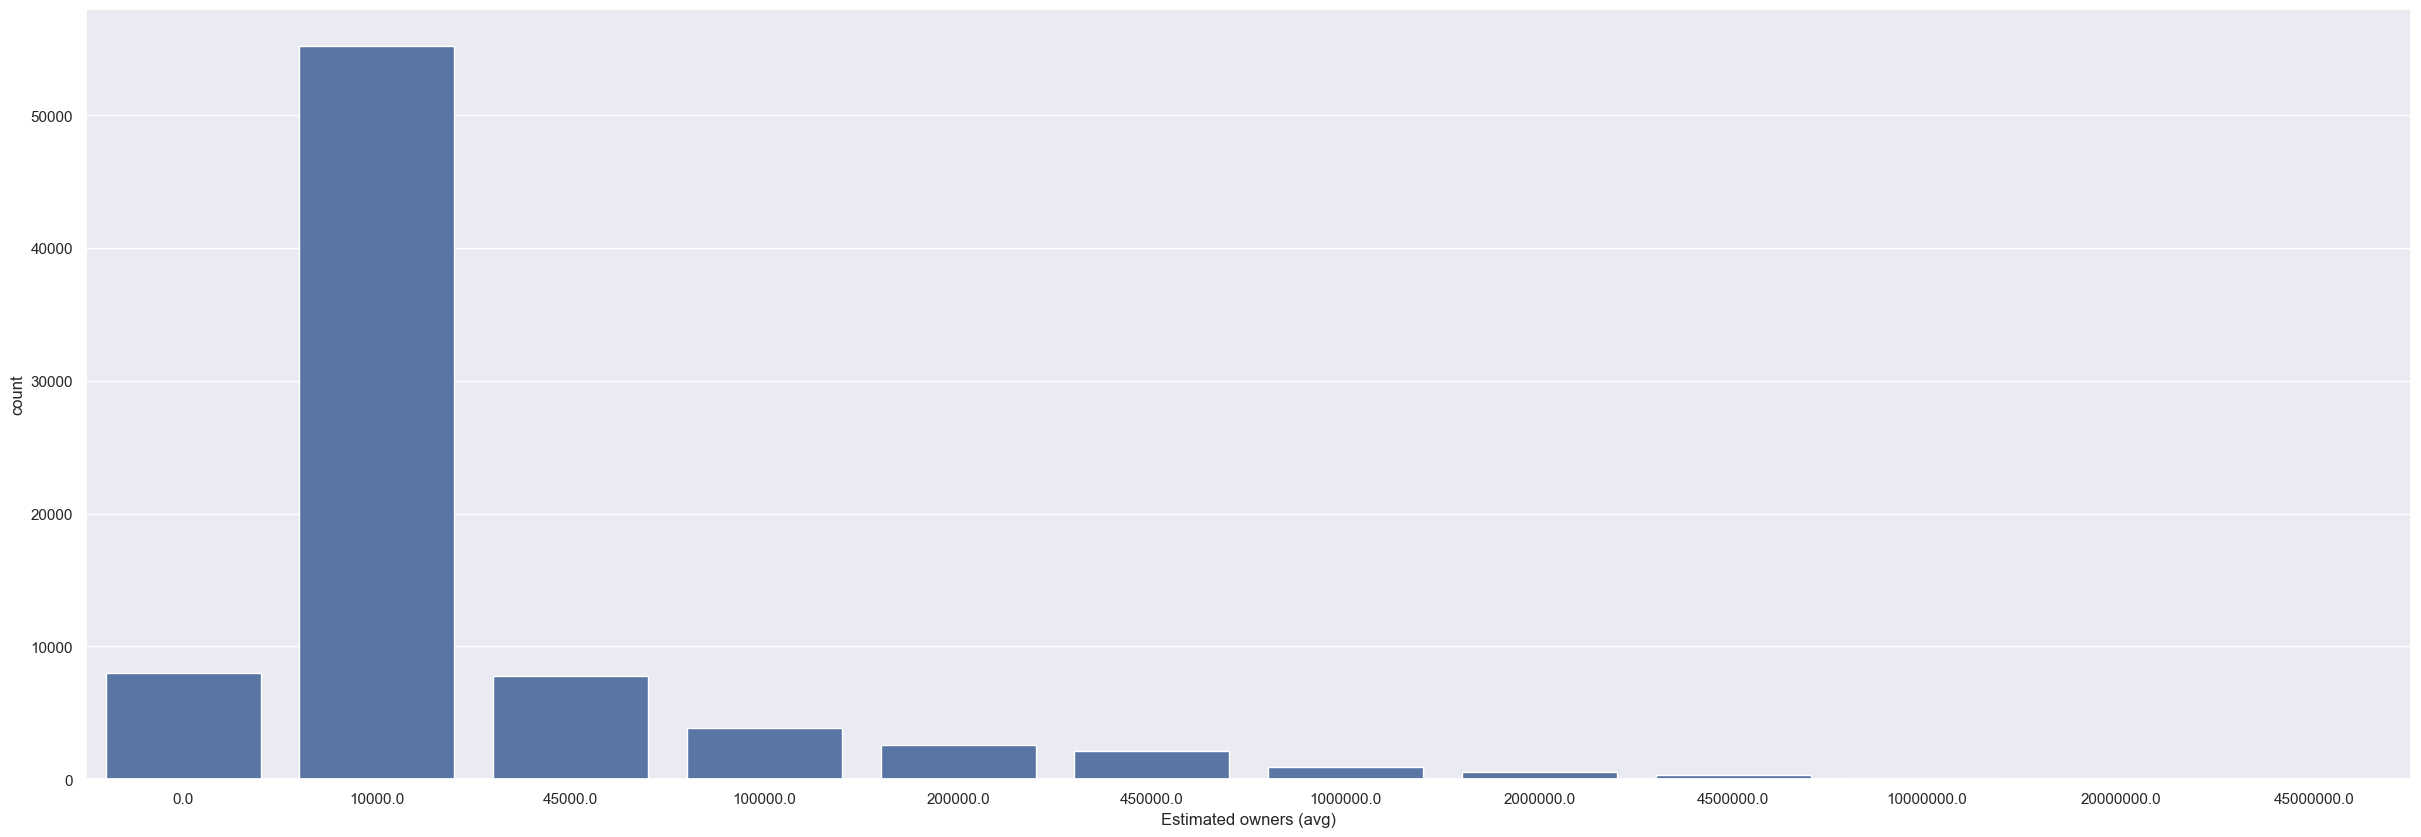

In [124]:
#sns.set_theme(rc={'figure.figsize':(30,10)})
#sns.countplot(x=df['Estimated owners (avg)'])
#print(df.groupby('Estimated owners (avg)').count().sum())
#df = df.nsmallest(81543, keep='first', columns='Estimated owners (avg)')

In [117]:
x = df.drop('Estimated owners (avg)', axis='columns')
y = df['Estimated owners (avg)']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import classification_report, confusion_matrix

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101,stratify=y)

Changed the type of algorithm to a regression one

In [120]:
#logmodel = LogisticRegression(max_iter=100)
logmodel_proper = LinearRegression()
#logmodel.fit(X_train, Y_train)
logmodel_proper.fit(X_train, Y_train)
#predictions = logmodel.predict(X_test)
predictions_proper = logmodel_proper.predict(X_test)

c:\Users\halt3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Added a function to show different types of metrics for analysis

In [121]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
#    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [122]:
#print(classification_report(Y_test, predictions, zero_division=True))
#print("=-=-=-=-=-==-=-=-=-=-==-=-=-=-=-==-=-=-=-=-=")
regression_results(Y_test,predictions_proper)

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      2407
     10000.0       0.75      0.91      0.82     16572
     45000.0       0.17      0.01      0.01      2339
    100000.0       0.26      0.03      0.05      1164
    200000.0       0.19      0.10      0.13       769
    450000.0       0.29      0.53      0.38       641
   1000000.0       0.21      0.20      0.20       272
   2000000.0       0.24      0.24      0.24       156
   4500000.0       0.20      0.14      0.17        99
  10000000.0       0.00      0.00      1.00        27
  20000000.0       0.00      0.09      0.00        11
  45000000.0       0.00      0.67      0.01         6

    accuracy                           0.64     24463
   macro avg       0.28      0.24      0.25     24463
weighted avg       0.65      0.64      0.58     24463

=-=-=-=-=-==-=-=-=-=-==-=-=-=-=-==-=-=-=-=-=
explained_variance:  0.7681
r2:  0.7681
MAE:  76255.0012
MSE:  209050870976.6885
RMSE:  

In [123]:
#print(confusion_matrix(Y_test, predictions))

[[    0  2407     0     0     0     0     0     0     0     0     0     0]
 [    0 15120    16    22    83    95    18     6    12    64   494   642]
 [    0  1619    12    34   100   133    29     8     5    26   170   203]
 [    0   657    10    31    84   180    20    14     6    19    52    91]
 [    0   286    13    21    74   249    20    12     2    13    20    59]
 [    0    98    14    11    38   342    61    22     2     6    10    37]
 [    0    11     4     1    10   125    54    36     4     2    10    15]
 [    0     4     0     0     3    39    36    37    16     0     6    15]
 [    0     0     1     0     0     8    18    19    14     0     9    30]
 [    0     0     0     0     0     2     2     2     7     0     4    10]
 [    0     0     0     0     0     0     0     0     1     0     1     9]
 [    0     0     0     0     0     0     0     0     1     1     0     4]]
